### Week 5 Answers ###

A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.
- horizontal lines are cluster merges
- vertical lines tell you which clusters/labels were part of merge forming that new cluster
- heights of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster

In [3]:
###Question 1 (coded version)
import numpy as np
from sklearn.cluster import KMeans

# Explicitly setting initial points to match those given in Q1 - normally you would not do this for KMeans.
# It's generally better to let sklearn handle the initialisation and set a fixed random_state if you need reproducability.
points = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
initials=np.array([[1],[2]])

clusters = KMeans(n_clusters=2, init=initials).fit(points)
print(clusters.cluster_centers_)
print(clusters.labels_)

[[2.5]
 [7.5]]
[0 0 0 0 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [12]:
###Question 2 
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform


inputs = np.array([[i] for i in range(1,11)])

d = pdist(inputs, 'euclidean')
print(squareform(d))
print(inputs)
len(d)

[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [2. 1. 0. 1. 2. 3. 4. 5. 6. 7.]
 [3. 2. 1. 0. 1. 2. 3. 4. 5. 6.]
 [4. 3. 2. 1. 0. 1. 2. 3. 4. 5.]
 [5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
 [6. 5. 4. 3. 2. 1. 0. 1. 2. 3.]
 [7. 6. 5. 4. 3. 2. 1. 0. 1. 2.]
 [8. 7. 6. 5. 4. 3. 2. 1. 0. 1.]
 [9. 8. 7. 6. 5. 4. 3. 2. 1. 0.]]
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


45

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


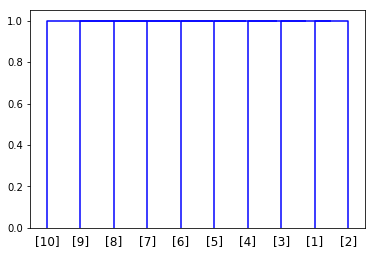

In [13]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# print(squareform(d))
#At each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster u with the remaining clusters in the forest.
hc1 = linkage(d, 'single') # min
dendrogram(hc1, labels=inputs)
plt.show()

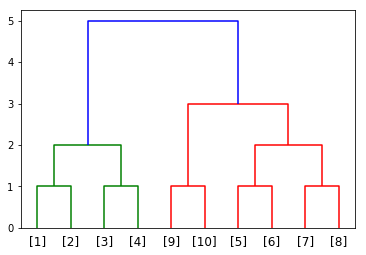

In [14]:
hc2 = linkage(d, 'average')
dendrogram(hc2, labels=inputs)
plt.show()

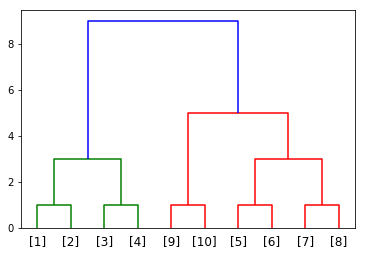

In [15]:
hc3 = linkage(d, 'complete') # max
dendrogram(hc3, labels=inputs)
plt.show()

Question 3 answer - discussion (ppt)

# VAT - Visual Assessment for Clustering Tendency

In lectures 5 and 6 we discussed the VAT algorithm for visualising the clustering tendency of a dataset.   Below is python code for VAT.  You can treat it as a black box (not worrying about the internal coding details) - a function which can be used to execute VAT on an input dataset.


In [16]:
import numpy as np
import math,random
from scipy.spatial.distance import pdist, squareform
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I




### Visualising iris datset using VAT

We will first recreate the visualisations of the iris dataset used in lectures (lecture 7).   Info about the iris dataset is [here](https://en.wikipedia.org/wiki/Iris_flower_data_set).  First a heatmap of the raw iris dataset is displayed.  Secondly a randomly ordered dissimilarity matrix for the objects in iris is shown - notice the lack of structure.   Thirdly the VAT visualisation is produced.  The heatmap function from the seaborn package is employed as a convenient tool for plotting heatmaps.

### Question 4a)
Plot VAT heatmap for iris data and tell how many clusters does the VAT visualisation reveal?   Is this what you were expecting given the wikipedia description of this dataset?


In [17]:
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns
iris2

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


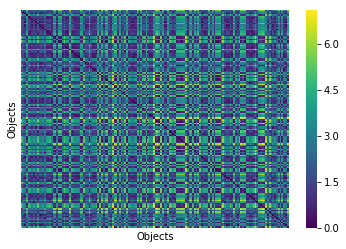

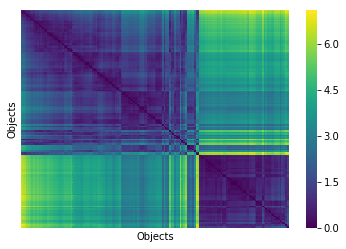

In [18]:
import seaborn as sns

##########################################################
#######Read in the datset###############
##########################################################
iris= pd.read_csv('iris.csv',dtype=None)   ###read in data
iris2=iris[["SepalLength","SepalWidth","PetalLength","PetalWidth"]] #retain a copy with only these columns

####Draw heatmap of raw Iris matrix#######j
#sns.heatmap(iris2,cmap='viridis',xticklabels=True,yticklabels=False)
#plt.show()

####Visualise the dissimilarity matrix for Iris using a heatmap (without applying VAT)####
iris3=iris2.copy().values
np.random.shuffle(iris3)   ####randomise the order of rows (objects)

sq = squareform(pdist(iris3))   ###compute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()



#####Apply VAT Algorithm to Iris dataset and visualise using heatmap########
RV, C, I = VAT(iris2)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

4a) answer
Two clear clusters on the diagonal.

There are three clusters (types of) iris, so it is at first surprising we can see only two clusters.  However,
two of the clusters (virginica and versicolor) are very close together and could arguably be one cluster.  Setosa is well separated from these.  We will see this in the PCA plot in shortly.

# Principal components analysis

Principal components analysis can be used for transforming data into a different (lower dimensional) representation.  This is particularly useful for visualisation.

The python sci-kit learn package (sklearn) contains functions which can be used for PCA.  Consider the example below of applying PCA on the iris dataset.


### Question 4b)

Performing PCA on Iris dataset and visualise using pc1 and pc2. Based on this visualisation - does it help with your answer to question 4a) ?

Variance explained by each PC [0.92461621 0.05301557]


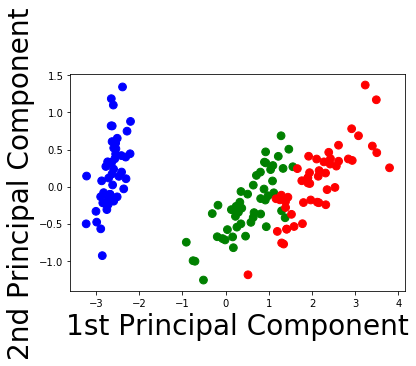

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA##########################################################
#######Example of performing PCA on Iris dataset and visualising####################
##########################################################


sklearn_pca = sklearnPCA(n_components=2)   #we want just the first two PCs
iris_sklearn = sklearn_pca.fit_transform(iris2)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)   #print out the amount of variance explained by each PC

#set up the colour scheme
palette=palette = ['blue','green','red']
colors=iris.Name.replace(to_replace=iris.Name.unique(),value=palette).tolist()

#plot the objects along the first two principal components, using the colour scheme
plt.scatter(iris_sklearn[:,0],iris_sklearn[:,1],s=60,c=colors)   #plot the PC's in 2D - s marker size
plt.xlabel('1st Principal Component', fontsize=28)
plt.ylabel('2nd Principal Component', fontsize=28)
plt.show()

4b) answer

Yes - we can see two of the three classes are very close together

### Practicing VAT and PCA

You will now practice using the australian crabs dataset from [this file](australian-crabs.csv).   This data describes 200 crabs collected from Fremantle Western Australia.   There are two species of crabs - blue and orange.   Within each species there are male and female.   There are 5 features:

+ FL - frontal lip
+ RW - rear width
+ CL - carapace length
+ CW - carapace width
+ BD - body depth

The first four of these are visualised as follows:

![crabs](crabsimage.png)

### Question 4c) 

Adapt the iris example to produce a VAT heatmap of the australian crabs dataset.   How many clusters are there?


In [20]:
crabsall = pd.read_csv('australian-crabs.csv')

print(crabsall.shape)
crabsall.head(5)

(200, 8)


,species,sex,index,FL,RW,CL,CW,BD
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


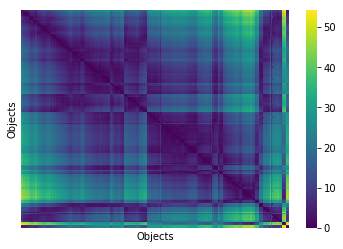

In [21]:
###Answer 4c

crabsall = pd.read_csv('australian-crabs.csv')
crabs=crabsall[['FL','RW','CL','CW','BD']]
crabs_std=crabs

RV, R, I = VAT(crabs_std)
x = sns.heatmap(RV, cmap='viridis', xticklabels=False, yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()

#can see two large clusters and one small cluster on the diagonal.

### Question 4d)

Using as input the 5 features 'FL','RW','CL','CW','BD' of the crabs, adapt the iris code above and determine the first and second principal components for the australian crabs data.  Print out the variance of each of these components.

Plot the crabs in 2D using the first two principal components.  Colour the crabs in red/yellow/green/black
<ul>
<li>violet=blue male crabs
<li>yellow= blue female crabs
<li>brown=orange male crabs
<li>black= orange female crabs
</ul>

In [22]:
####4d) answer

sklearn_pca = sklearnPCA(n_components=2)   
crabs_sklearn = sklearn_pca.fit_transform(crabs_std)
crabsall['label']=crabsall['species'] + crabsall['sex']   #create a new category with 4 bins: blue-male, blue-female,
                                                          #orange-male, orange-female.
    
crabsall.head(5)                                                   

,species,sex,index,FL,RW,CL,CW,BD,label
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale


Variance explained by each PC [0.9824718  0.00905511]


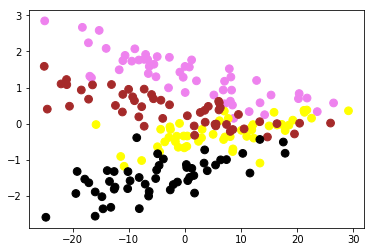

In [23]:
# define color palette
palette = ['violet','yellow','brown','black']

# take first column and replace labels with colors, return a list
colors = crabsall.label.replace(to_replace=crabsall.label.unique(), value=palette).tolist()

print("Variance explained by each PC", sklearn_pca.explained_variance_ratio_)
plt.scatter(crabs_sklearn[:,0], crabs_sklearn[:,1], s=60,c=colors)
plt.show()

### Question 4e)
Based on your visualisation for the <em>australian crabs</em> dataset, speculate about the "meaning" of the first two
principal components.  What might each be measuring?

Answer:

1st PC likely to be an overall measure of crab size.   Note that males not always bigger than females and orange and blue have overlapping size ranges.

2nd PC likely to be overall measure of shape.  

Taken together, these two features do a reasonable job of separating the four categories crabs.



Question 5 answer

lower error is better, but this decreases monotnically as number of clusters increases.  It is
common to plot an SSE versus number of clusters graph and look for the elbow, the correct number of clusters is conjectured to be at the elbow (this is a heuristic) ..  See e.g.

https://bl.ocks.org/rpgove/0060ff3b656618e9136b

Other popular methods includ silhouette analysis and gap statistics, described here: https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/

You could also simply sum the distance of each point from its cluster centroid, i.e. remove the square in the SSE calculation.